# Query processing using Korp

In this session, will query for words from Korp, and save data relating to them for further analysis

First, will start with defining some variables that we're interested in.

In [184]:
from IPython.display import display

# corpora is a variable containing the corpora we are querying, as identified in Korp
corpora =  "klk_fi_1909,klk_fi_1908,klk_fi_1907,klk_fi_1906,klk_fi_1905,klk_fi_1904,klk_fi_1903,klk_fi_1902,klk_fi_1901,klk_fi_1900,klk_fi_1899,klk_fi_1898,klk_fi_1897,klk_fi_1896,klk_fi_1895,klk_fi_1894,klk_fi_1893,klk_fi_1892,klk_fi_1891,klk_fi_1890,klk_fi_1889,klk_fi_1888,klk_fi_1887,klk_fi_1886,klk_fi_1885,klk_fi_1884,klk_fi_1883,klk_fi_1882,klk_fi_1881,klk_fi_1880,klk_fi_1879,klk_fi_1878,klk_fi_1877,klk_fi_1876,klk_fi_1875,klk_fi_1874,klk_fi_1873,klk_fi_1872,klk_fi_1871,klk_fi_1870,klk_fi_1869,klk_fi_1868,klk_fi_1867,klk_fi_1866,klk_fi_1865,klk_fi_1864,klk_fi_1863,klk_fi_1862,klk_fi_1861,klk_fi_1860,klk_fi_1859,klk_fi_1858,klk_fi_1857,klk_fi_1856,klk_fi_1855,klk_fi_1854,klk_fi_1853,klk_fi_1852,klk_fi_1851,klk_fi_1850,klk_fi_1849,klk_fi_1848,klk_fi_1847,klk_fi_1846,klk_fi_1845,klk_fi_1844,klk_fi_1842,klk_fi_1841,klk_fi_1840,klk_fi_1839,klk_fi_1838,klk_fi_1837,klk_fi_1836,klk_fi_1835,klk_fi_1834,klk_fi_1833,klk_fi_1832,klk_fi_1831,klk_fi_1830,klk_fi_1829,klk_fi_1827,klk_fi_1826,klk_fi_1825,klk_fi_1824,klk_fi_1823,klk_fi_1822,klk_fi_1821,klk_fi_1820"
# query is the word stem (actually a regular expression) we're interested in.
query = '[wv]ai[wv]ai.*'
# number of hits to return from Korp (+1)
maxHits = '150000'

For regular expressions, see [this](http://www.regular-expressions.info/reference.html) and if you further want to modify the query, see [the CPQ query language tutorial](http://cwb.sourceforge.net/files/CQP_Tutorial/node8.html).

Now, the next bit calls the API of Korp and returns results to us as a JSON object.

In [111]:
import requests

response = requests.get("https://korp.csc.fi/cgi-bin/korp.cgi?cqp=%5Blemma+%3D+\""+query+"\"%5D&sort=keywordcommand=query&indent=2&defaultcontext=0+words&show=lemma&start=0&end="+maxHits+"&show_struct=text_dateto,text_datefrom&corpus="+corpora.upper(), verify=False, timeout=60)
json_data = response.json()
print("Hit count "+str(json_data['hits'])+" should be below our maxHits ("+str(maxHits)+") if we are to get all data")
json_data

Hit count 146688 should be below our maxHits (150000) if we are to get all data


{'corpus_hits': {'KLK_FI_1820': 0,
  'KLK_FI_1821': 0,
  'KLK_FI_1822': 3,
  'KLK_FI_1823': 1,
  'KLK_FI_1824': 1,
  'KLK_FI_1825': 0,
  'KLK_FI_1826': 1,
  'KLK_FI_1827': 0,
  'KLK_FI_1829': 5,
  'KLK_FI_1830': 6,
  'KLK_FI_1831': 2,
  'KLK_FI_1832': 1,
  'KLK_FI_1833': 6,
  'KLK_FI_1834': 1,
  'KLK_FI_1835': 1,
  'KLK_FI_1836': 40,
  'KLK_FI_1837': 7,
  'KLK_FI_1838': 0,
  'KLK_FI_1839': 5,
  'KLK_FI_1840': 6,
  'KLK_FI_1841': 4,
  'KLK_FI_1842': 0,
  'KLK_FI_1844': 8,
  'KLK_FI_1845': 4,
  'KLK_FI_1846': 4,
  'KLK_FI_1847': 22,
  'KLK_FI_1848': 9,
  'KLK_FI_1849': 24,
  'KLK_FI_1850': 26,
  'KLK_FI_1851': 50,
  'KLK_FI_1852': 31,
  'KLK_FI_1853': 59,
  'KLK_FI_1854': 51,
  'KLK_FI_1855': 193,
  'KLK_FI_1856': 78,
  'KLK_FI_1857': 209,
  'KLK_FI_1858': 197,
  'KLK_FI_1859': 283,
  'KLK_FI_1860': 322,
  'KLK_FI_1861': 255,
  'KLK_FI_1862': 394,
  'KLK_FI_1863': 420,
  'KLK_FI_1864': 375,
  'KLK_FI_1865': 621,
  'KLK_FI_1866': 414,
  'KLK_FI_1867': 418,
  'KLK_FI_1868': 598,
  'KLK_FI_

The above gives us the data as individual occurrences, but what we really want is a way to map each lemma to the count of its occurrences by year. The following code does this by assembling a nested Python dict.

In [97]:
lemmaYearCountDict = dict()
for match in json_data['kwic']:
    lemma = match['tokens'][0]['lemma']
    year = match['structs']['text_datefrom'][:4]
    if not lemma in lemmaYearCountDict:
        lemmaYearCountDict[lemma]=dict()
    if not year in lemmaYearCountDict[lemma]:
        lemmaYearCountDict[lemma][year]=1
    else:
        lemmaYearCountDict[lemma][year]+=1
lemmaYearCountDict


{'waiwaishoito-ohjesäännuikst': {'1894': 1},
 'waiwaiihoiloa': {'1901': 1, '1907': 1},
 'waiwaiihoi': {'1901': 1, '1905': 1, '1908': 1},
 'vaivaishoitohalHtuksen': {'1907': 4},
 'waiwaislalosic': {'1895': 1},
 'waiwaishoitoyhoyskunta': {'1909': 1},
 'waiwaistaloissamme': {'1895': 1, '1896': 1, '1899': 1},
 'waiwaishoiwmenot': {'1908': 1},
 'waiwaishoiiolainsäädäntölaitolseen': {'1906': 1},
 'waiwaislautat': {'1906': 1},
 "waiwaishoitora'": {'1902': 1},
 'vaivaistalolJa': {'1908': 1},
 'waiwaismakasiiniA': {'1909': 1},
 'vaivainenhoitolaki': {'1900': 1, '1903': 1, '1906': 1, '1908': 3, '1909': 3},
 'waiwaifute': {'1908': 1},
 'waiwaishoilohallitutstlta': {'1903': 1},
 'vaivaistalovelka': {'1906': 4},
 'waiwaishoitoasetuSta': {'1905': 1},
 'waiwaishoidontarlast': {'1896': 1},
 'waiwaistalolaiucn': {'1895': 1},
 'waiwaismnksut': {'1903': 1},
 'vaivaishoitohallitulsia': {'1901': 1},
 'waiwaislasslllla': {'1895': 1},
 'waiwaishoitohallitiiksen': {'1907': 1},
 'waiwaishoitotorkaslelija': {'1

Dicts are simple core Python data structures, but we can do more if we load the Pandas data processing library and use its DataFrame.

In [187]:
import pandas as pd
import numpy as np

lemmaFrame = pd.DataFrame(lemmaYearCountDict).replace(np.nan,0).T
print('Frame dimensions: '+str(lemmaFrame.columns.size)+"x"+str(lemmaFrame.index.size))
lemmaFrame.head()


Frame dimensions: 17x14445


,,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909
vaivai,0,0,2,10,3,5,11,11,3,6,3,5,2,8,7,7,6
vaivai&hoitohalliiukseita,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
vaivai&hoitoyhdyskunnan,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
vaivai'B-lnvö8ll,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
vaivai-,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


For example, we can use this to plot instances of all matched words by year

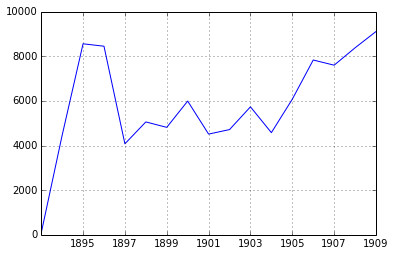

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

lemmaFrame.sum().plot()

But, as you may already know, the KLK data in Korp has horrible OCR problems. To counter those, let's write the data out to a CSV file and load it in another tool (OpenRefine) for some interactive cleanup.

In [116]:
lemmaFrame.to_csv("waiwa.csv")
print("Wrote waiwa.csv")

Wrote waiwa.csv


Now view and download [waiwa.csv](../edit/waiwa.csv), and move on to processing it using OpenRefine.

After processing, we need to reload the data from the one exported by OpenRefine. [Upload it](../tree) as waiwa2.csv in order to run the following code.

In [190]:
lemmaFrame2 = pd.read_csv('waiwa2.csv')
print('Frame dimensions: '+str(lemmaFrame2.columns.size)+"x"+str(lemmaFrame2.index.size))
lemmaFrame2.head()

Frame dimensions: 18x14445


,Column,Column2,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909
0,vaivais,0,0,2,10,3,5,11,11,3,6,3,5,2,8,7,7,6
1,vaivaishoitohallituksen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,vaivaishoito-yhdyskunnan,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,vaivai'b-lnvö8ll,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,vaivais,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


The frame is still the same length as before. That is because while OpenRefine unified naming conventions, it did not actually join any rows. Let's do that next.

In [191]:
lemmaFrame3 = lemmaFrame2.groupby('Column').aggregate(np.sum)
print('Frame dimensions: '+str(lemmaFrame3.columns.size)+"x"+str(lemmaFrame3.index.size)+" (vs "+str(lemmaFrame2.columns.size)+"x"+str(lemmaFrame2.index.size)+")")
lemmaFrame3.head()

Frame dimensions: 17x2845 (vs 18x14445)


,Column2,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909
Column,,,,,,,,,,,,,,,,,
vaivai'b-lnvö8ll,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
vaivai'ötaloissll,1,5,4,10,2,3,1,1,2,2,0,1,3,1,3,4,2
vaivai-'hoitoasetnfscn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
vaivai-^kartanossa,0,8,28,10,21,11,14,10,7,8,2,3,1,17,4,6,2
vaivai-bekbi,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


Now that's more like it. Finally, to get individual word level graphs, lets limit the words to those occurring most in the total corpus. 

,Column2,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909
Column,,,,,,,,,,,,,,,,,
vaivaistalosta,13,666,1264,1593,655,885,636,757,683,722,1070,798,1232,1478,1504,1789,1516
vaivainen-aitta,8,426,616,521,301,330,371,421,541,549,542,409,666,761,792,804,810
vaivaishoitohallitulsen,9,207,399,370,192,249,506,365,229,318,589,506,634,707,657,538,720
vaivaistalon,1,380,621,563,292,318,283,321,306,225,343,278,298,358,523,563,568
vaivais,2,223,448,536,280,260,248,338,212,249,260,223,282,321,288,343,422
vaivaishoidon,9,305,521,425,186,204,260,318,176,233,246,173,256,281,239,262,308
vaivaishoito,2,201,415,378,161,198,223,250,156,167,170,131,192,245,211,243,310
vaivainen,2,80,219,193,171,234,192,200,202,197,218,205,214,295,309,254,289
vaivaishoitohallituksen,0,102,127,122,74,102,101,116,62,75,109,97,113,152,180,206,276


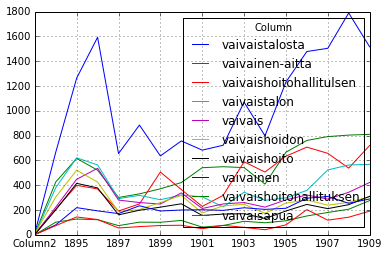

In [192]:
sorted =lemmaFrame3.T.sum()
sorted.sort(ascending=False)
top10 = lemmaFrame3.T[sorted.index[:10]]
display(top10.T)
top10.plot()